# Dijkstra's Shortest Path Algorithm 

> ⚡ ***Reference*** ⚡

* Dijktra's Shortest Path Algorithm (Conceptual Idea): https://youtu.be/pVfj6mxhdMw?t=646
* Code Origin: https://www.udacity.com/blog/2021/10/implementing-dijkstras-algorithm-in-python.html
* Dictionaries Data Type: https://docs.python.org/3/tutorial/datastructures.html#dictionaries
* Reference to dict.get(key[, default]) : https://docs.quantifiedcode.com/python-anti-patterns/correctness/not_using_get_to_return_a_default_value_from_a_dictionary.html
##### 👾💜 *.Modified by Jasmoon Chan.* 👾💜

In [ ]:
# Install library to do printing table,
!pip install tabulate

In [ ]:
# Import required library
import sys
from tabulate import tabulate

### Construct a class to hold the Graph object 
With several functions:

*   def construct_graph()
> ✅ Make sure every nodes contains every edges and respective weightages that they're connected to
*   def get_nodes()
> ✅ Get all nodes in this Graph object
*   def get_adjacent_nodes()
> ✅ Gain all adjacent nodes of a node that it is connected to
*   def gain_weightage()
> ✅ Get the weight of an edge
*   def show_step()
> ✅ With the use of *tabulate* library, show the steps involved in calculating the shortest path with Dijkstra's Algorithm



In [ ]:
# A class used to hold the graph data before we implement the Dijkstra's Algorithm
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)

    def construct_graph(self, nodes, init_graph):
        '''
        This method makes sure that the graph is symmetrical. In other words, if there's a path from node A to B with a value V, there needs to be a path from node B to node A with a value V.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        # Add elements from the init_graph dictionary
        graph.update(init_graph)

        '''
        # Example 2D dictionary: {'u1': {'v1': x, 'v2': y, 'v3': z}, 'u2': {...}, 'u3': {...}}
        # graph.items() -> (k,v)
        Key   : 'u1'
        Value : {'v1': x, 'v2': y, 'v3': z}
        '''
        for node, edges in graph.items():
           # Ensure that an edge with its weight is recorded in the value of both (u,v) keys (dictionary)
            for adjacent_node, weight in edges.items():
                # Check if the adjacent node(v) from the origin node(u) contains that particular weighted edge(relations) or not, if not add it!
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = weight
        return graph

    def get_nodes(self):
        "Returns the nodes of the graph."
        return self.nodes

    def get_adjacent_nodes(self, node):
        "Returns the neighbors of a node."
        connections = []
        for possible_neighbor in self.nodes:
            # If inside a specific node, e.g u1, can get v1,,v2,... Add those relations(edges) into the connections list
            if self.graph[node].get(possible_neighbor, False) != False:
                connections.append(possible_neighbor)
        return connections

    def gain_weightage(self, u, v):
        "Returns the value of an edge between two nodes."
        return self.graph[u][v]

    def show_step(self, header, shortest_distance, previous_nodes):
        all_result = []
        for node in self.nodes:
            per_row = []
            per_row.append(str(node))
            s = shortest_distance.get(node)
            p = previous_nodes.get(node)
            if s != None:
                if s == sys.maxsize:
                    per_row.append("Infinity")
                else:
                    per_row.append(str(s))
            else:
                per_row.append("-")
            if p == None:
                per_row.append("-")
            else:
                per_row.append(str(p))
            all_result.append(per_row)
        print(tabulate(all_result, header, tablefmt="pretty"))
        print("\n")

### Helper Function



*   def print_current_path()
> ✅ It's used in show_step() function. If the shortest distance value to a node is being updated, then we will show the path from starting node to that node.

*   def print_result()
> ✅ It's used in the final to show the exact shortest path from source node to target destination(node) by tracing back the previous node one-by-one.



In [ ]:
def print_current_path(previous_nodes, shortest_distance, source_node, target_node):
    path = []
    node = target_node

    # Reverse back previous node and find the dijkstra's shortest path
    while node != source_node:
        path.append(node)
        node = previous_nodes[node]

    # Add the start node manually
    path.append(source_node)
    return " -> ".join(reversed(path))

def print_result(previous_nodes, shortest_distance, source_node, target_node):
    path = []
    node = target_node

    # Reverse back previous node and find the dijkstra's shortest path
    while node != source_node:
        path.append(node)
        node = previous_nodes[node]

    # Add the start node manually
    path.append(source_node)

    print("We found the following best path with a length of {}.".format(shortest_distance[target_node]))
    print(" -> ".join(reversed(path)))

### The Core of Dijkstra's Algorithm

💠 ***Step in getting the shortest path*** 💠     


1.   Create 4 lists
       * unvisited_node
      > 📌 Declare the list with filling up with all nodes from the graph object
       * visited_node=[]
      > 📌 Used to store a node whenever it has done visiting
       * shortest_distance = {}
      > 📌 A dictionary used to store the node and its respective shortest distance from source node
       * previous_nodes = {}
      > 📌 A dictionary used to store the previous node of visiting that node given it's the current smallest known distance.

2.   Make the shortest distance of *source_node* (starting node) = 0 while assign infinity to *shortest distance from starting node* of other nodes.

3. Choose a node with the smallest known distance from the start vertex, provided that it's still an unvisited node. 
> 💡 By default, at initial, since only the *source_node* (starting node) = 0. So, we will start with the source_node.

4. From Step 3, gaining a list of the selected node's neigbors and remove the neigbor's that have been visited (visited_node). 
> 💡 Since, we only need to visit those connected yet unvisited node(s) to calculate and update if there's shortest path.

5. Repeatly visit every selected adjacent node(s) from Step 4, and try to compute the shortest distance. 
> If the newly computed value is smaller than the old value, a shorter distance has been found.
  *   ✅ Update the value in *shortest_distance* dictionary
  *   ✅ Update the *previous_node* dictionary *(To gain the current best path to this node later)*

6. Once Step 5 is done, move the node from *unvisited_node* list to *visited_node* list

7. Repeat Step 3 - Step 6 until all nodes have been *done visited*. 
> 💡 ***Done visited*** means len(unvisited_node) = 0 










In [ ]:
def dijkstra_algorithm(graph, source_node):
    unvisited_nodes = list(graph.get_nodes())
    visited_nodes =[]

    # This dict to record the cost of visiting each node !**from the source_node** and update it as we move along the graph
    shortest_distance = {}

    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}

    # First, Initialize the "infinity" value to all the unvisited nodes
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_distance[node] = max_value
    # However, we initialize the starting node's value with 0
    shortest_distance[source_node] = 0  # {'source_node':0 , 'node1': infinity, 'node2': infinity, ... }

    """
    Showing the steps - THE VERY BEGINNING
    """
    headers = ['Vertex', f"Shortest distance from {source_node}","Previous vertex"]
    print("[Initial]\n")
    graph.show_step(headers, shortest_distance, previous_nodes)

    # The algorithm executes until we visit all nodes
    while unvisited_nodes:
        # The code block below finds the node with the lowest score (smallest known distance from the start vertex)
        current_min_node = None
        for node in unvisited_nodes:  # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            # If there's smaller value, than the node with smaller value become the current_min_node. In the end, we want the most minimum node to continue our visitings
            elif shortest_distance[node] < shortest_distance[current_min_node]:
                current_min_node = node
        """
        Show the current visiting node
        """
        print(f"The current node: {current_min_node}\n")

        # The code block below retrieves the current node's neighbors and updates their distances (if any smaller value of distance(cost) found)
        # Gain all relations
        adjacent_nodes = graph.get_adjacent_nodes(current_min_node)
        # Remove those already visited node from the list (We just visit those nodes that are currently still unvisited)
        neighbors =[]
        for adjacent_node in adjacent_nodes:
            if adjacent_node in unvisited_nodes:
                neighbors.append(adjacent_node)
        for neighbor in neighbors:
            tentative_value = shortest_distance[current_min_node] + graph.gain_weightage(current_min_node, neighbor)
            print(
                f"\n[TRY]: {current_min_node}->{neighbor}: {shortest_distance[current_min_node]} + {graph.gain_weightage(current_min_node, neighbor)} = {tentative_value}")
            # If newly_found_value is smaller than old_value
            if tentative_value < shortest_distance[neighbor]:
                shortest_distance[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
                print(f"\n[FOUND]: {print_current_path(previous_nodes, shortest_distance, source_node, neighbor)}: {shortest_distance[current_min_node]} + {graph.gain_weightage(current_min_node, neighbor)} = {tentative_value}")
                print(f"[FOUND] Shorter distance found. Updated to {shortest_distance[neighbor]}\n")
            else:
                print(f"[NOT FOUND] {current_min_node}->{neighbor} takes longer path: No updates")

        """
        Show the steps (any updates) after the current node done visiting and calculating the cost 
        """
        graph.show_step(headers, shortest_distance, previous_nodes)

        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)
        visited_nodes.append(current_min_node)
        print(f"Visited = {visited_nodes} | Unvisited = {unvisited_nodes}\n")

    return previous_nodes, shortest_distance

### Test Case
#### 💠 The question is as such find the shortest path and its length between **a and z** in the given weighted graph ❓

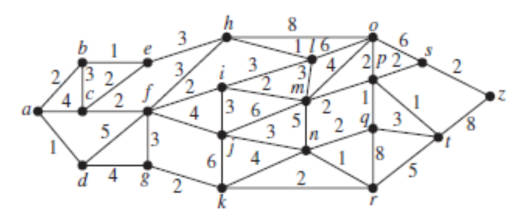

### 🔡 Input

> Declare a list of nodes in the graph as shown above.
There's 21 nodes: *From **a-z** except **u,v,w,x,y** node* 

In [ ]:
# Test case #
# [INITIALISE] List out all nodes in the graph
import string
# Nodes of A-Z except u,v,w,x,y
nodes = list(string.ascii_lowercase)
nodes.remove('u')
nodes.remove('v')
nodes.remove('w')
nodes.remove('x')
nodes.remove('y')

### 🔨 Create an 2D dictionary 
> To store each nodes and their weightage to their adjacent nodes

In [ ]:
# An empty 1D dictionary
init_graph = {}
for node in nodes:
    # Creating a 2D dictionaty like {'u1': {'v1': x, 'v2':y, 'v3':z}, 'u2': {...}, 'u3':{...}}
    init_graph[node] = {}

### 🔢 Input

> Walkthrough the graph, list out the edges and their respective weights before we can run the Dijkstra's Algorithm

In [ ]:
### INPUT ###
# List out the u, v, weight in a graph
init_graph["a"]["b"] = 2
init_graph["a"]["c"] = 4
init_graph["a"]["d"] = 1
init_graph["b"]["c"] = 3
init_graph["b"]["e"] = 1
init_graph["c"]["e"] = 2
init_graph["c"]["f"] = 2
init_graph["d"]["f"] = 5
init_graph["d"]["g"] = 4
init_graph["e"]["h"] = 3
init_graph["f"]["h"] = 3
init_graph["f"]["g"] = 3
init_graph["f"]["i"] = 2
init_graph["f"]["j"] = 4
init_graph["g"]["k"] = 2
init_graph["h"]["o"] = 8
init_graph["h"]["l"] = 1
init_graph["i"]["j"] = 3
init_graph["i"]["m"] = 2
init_graph["i"]["l"] = 3
init_graph["j"]["k"] = 6
init_graph["j"]["m"] = 6
init_graph["j"]["n"] = 3
init_graph["k"]["n"] = 4
init_graph["k"]["r"] = 2
init_graph["l"]["m"] = 3
init_graph["l"]["o"] = 6
init_graph["m"]["o"] = 4
init_graph["m"]["p"] = 2
init_graph["m"]["n"] = 5
init_graph["n"]["q"] = 2
init_graph["n"]["r"] = 1
init_graph["o"]["p"] = 2
init_graph["o"]["s"] = 6
init_graph["p"]["s"] = 2
init_graph["p"]["q"] = 1
init_graph["p"]["t"] = 1
init_graph["q"]["t"] = 3
init_graph["q"]["r"] = 8
init_graph["r"]["t"] = 5
init_graph["s"]["z"] = 2
init_graph["t"]["z"] = 8

### 🔡 Input

> Put in the starting node *(source_node)* and the ending node *(target_node)*.

### ✨ Result ✨
>After running the *dijkstra_algorithm()*, use helper function *print_result()* to show the shortest path from source node to target node with the respective length

In [ ]:
# Forming a complete graph with stating all edges connected for every vertex
graph = Graph(nodes, init_graph)

# Result
previous_nodes, shortest_distance = dijkstra_algorithm(graph=graph, source_node="a")
print_result(previous_nodes, shortest_distance, source_node="a", target_node="z")

[Initial]

+--------+--------------------------+-----------------+
| Vertex | Shortest distance from a | Previous vertex |
+--------+--------------------------+-----------------+
|   a    |            0             |        -        |
|   b    |         Infinity         |        -        |
|   c    |         Infinity         |        -        |
|   d    |         Infinity         |        -        |
|   e    |         Infinity         |        -        |
|   f    |         Infinity         |        -        |
|   g    |         Infinity         |        -        |
|   h    |         Infinity         |        -        |
|   i    |         Infinity         |        -        |
|   j    |         Infinity         |        -        |
|   k    |         Infinity         |        -        |
|   l    |         Infinity         |        -        |
|   m    |         Infinity         |        -        |
|   n    |         Infinity         |        -        |
|   o    |         Infinity         |